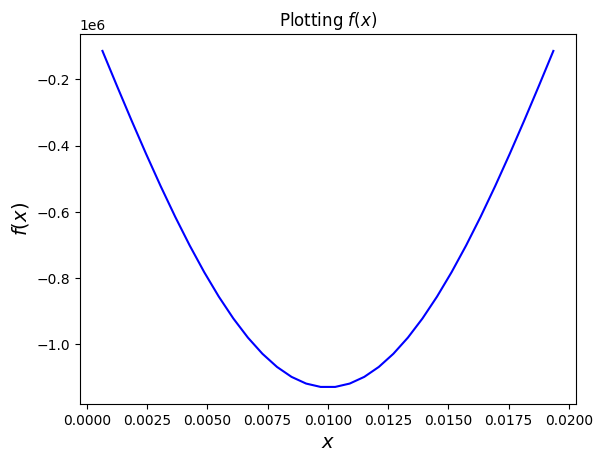

Tiempo para la eliminacion de Gauss en segundos:  0.001327499994658865


C:\Users\nicol\AppData\Local\Temp\ipykernel_2904\1571737733.py:59: RuntimeWarning: divide by zero encountered in scalar divide
  v[i] = (fh2[i] - suma) / A[i, i]


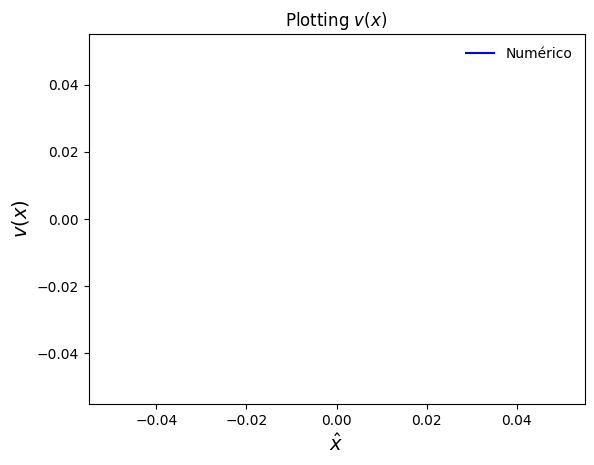

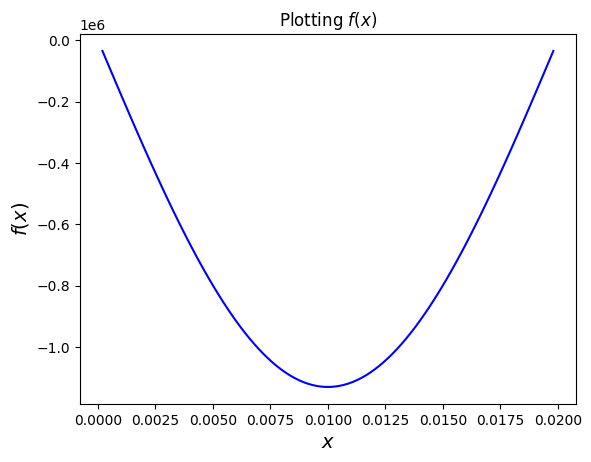

Tiempo para la eliminacion de Gauss en segundos:  0.0165013999940129


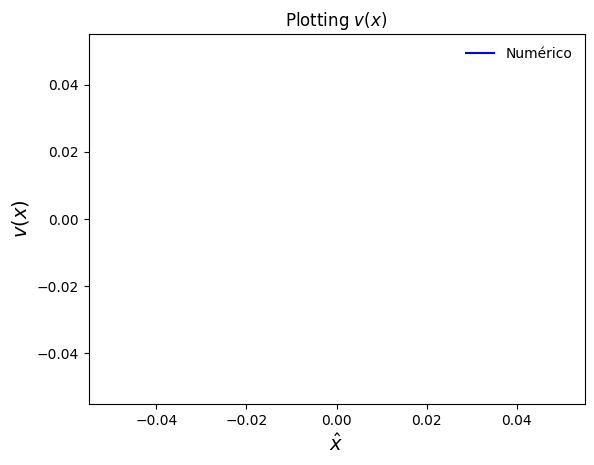

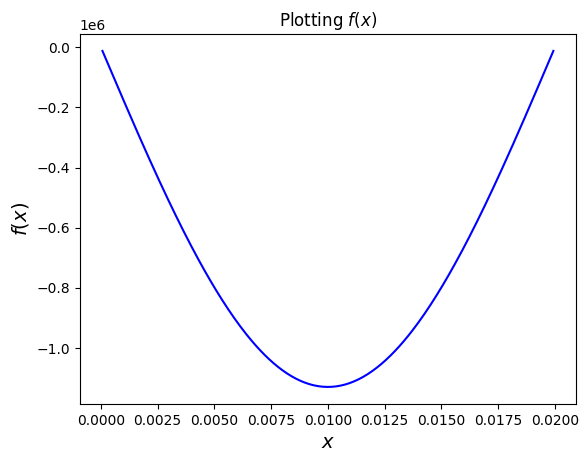

Tiempo para la eliminacion de Gauss en segundos:  0.16777889999502804


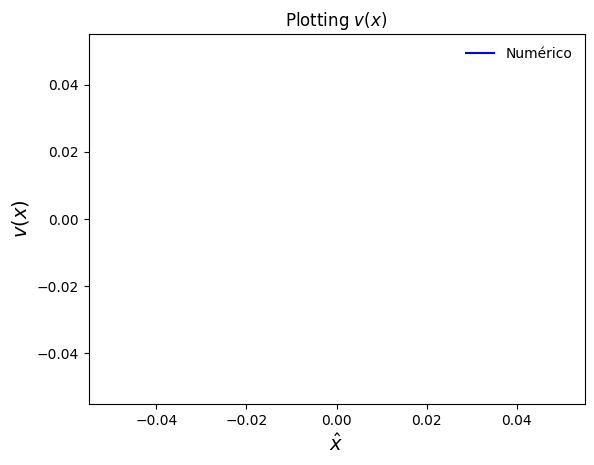

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import time

N = [30, 100, 300]
D = 0.02        # en cm
rho_0 = 1e-5    # en C/m^3
Va = 0          # ambos V en Volts
Vb = 10
e_0 = 8.85e-12  # permisividad del vacío

for n in range(3):
    h = D / (N[n] + 1)

    x = np.linspace(h, D-h, N[n] + 2)
    rho = rho_0 * np.sin(np.pi * x / D)
    f = -rho / e_0
    fh2 = f * h**2  
    f[0] -= Va 
    f[-1] -= Vb 

    # Graficamos la funcion f(x)
    plt.plot(x, f, color='blue')
    plt.title('Plotting $f(x)$')
    plt.xlabel("$x$", fontsize=14)
    plt.ylabel("$f(x)$", fontsize=14)
    plt.show()

    # Construimos la matriz tridiagonal A
    A = np.zeros([N[n]+2, N[n]+2])
    for i in range(N[n]):
        for j in range(N[n]):
            if i == j:
                A[i, j] = -2.
            elif abs(i - j) == 1:
                A[i, j] = 1.

    # Initializamos el vector solucion v
    v = np.zeros(N[n]+2)

    # eliminacion de Gauss
    start = time.perf_counter()
    for i in range(N[n]):  # i is the column index
        p1 = A[i, i]
        for j in range(N[n]):  # j is the pivot row index
            if j > i:
                p2 = A[j, i]
                fh2[j] -= p2 * fh2[i] / p1
                A[j,:] -= p2 * A[i,:] / p1           
    #            for k in range(N[n]):
    #                A[j, k] = A[j, k] - p2 * A[i, k] / p1

    end = time.perf_counter()
    print('Tiempo para la eliminacion de Gauss en segundos: ', end - start)

    # sustitucion
    for i in range(N[n] + 1, -1, -1):
        suma = np.dot(A[i, i + 1:], v[i + 1:])
        v[i] = (fh2[i] - suma) / A[i, i]

    # Graficamos la solucion v(x)
    plt.plot(x, v, color='blue', label='Numérico')
    plt.title('Plotting ${v}({x})$')
    plt.xlabel("$\hat{x}$", fontsize=14)
    plt.ylabel("${v}({x})$", fontsize=14)
    plt.legend(loc='upper right', frameon=False)
    plt.show()

In [17]:
x = np.linspace(0, D, 30+2)[1:-1]
print(x)
x[0] -= 0.0001
print(x)

[0.00064516 0.00129032 0.00193548 0.00258065 0.00322581 0.00387097
 0.00451613 0.00516129 0.00580645 0.00645161 0.00709677 0.00774194
 0.0083871  0.00903226 0.00967742 0.01032258 0.01096774 0.0116129
 0.01225806 0.01290323 0.01354839 0.01419355 0.01483871 0.01548387
 0.01612903 0.01677419 0.01741935 0.01806452 0.01870968 0.01935484]
[0.00054516 0.00129032 0.00193548 0.00258065 0.00322581 0.00387097
 0.00451613 0.00516129 0.00580645 0.00645161 0.00709677 0.00774194
 0.0083871  0.00903226 0.00967742 0.01032258 0.01096774 0.0116129
 0.01225806 0.01290323 0.01354839 0.01419355 0.01483871 0.01548387
 0.01612903 0.01677419 0.01741935 0.01806452 0.01870968 0.01935484]
